# Used 3 Grace days (in total 4 used till now)

# Name:- Sojas Khandagale

# GitHub UserName:- sojas07

# USC ID:- 4955206780

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import math
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, precision_score, f1_score, classification_report, log_loss, accuracy_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy.stats import variation
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, silhouette_score, calinski_harabasz_score
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from scipy.spatial.distance import hamming
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, confusion_matrix, recall_score, pairwise_distances, ConfusionMatrixDisplay, precision_score, f1_score, classification_report, roc_auc_score, log_loss, accuracy_score, mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## 1.Supervised, Semi-Supervised, and Unsupervised Learning

### b)Monte-Carlo Simulation : Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,recall,F1-score, and AUC) that you obtain from each algorithm.

#### i. Supervised Learning: Train an L1-penalized SVM to classify the data.Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall,F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [2]:
df = pd.read_csv('../data/HW8/wdbc.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df_M = df[df[1] == 'M']
df_M = df_M.iloc[:,1:]
df_B = df[df[1] == 'B']
df_B = df_B.iloc[:,1:]

In [4]:
df_M

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [5]:
df_B

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [6]:
X_M = df_M.iloc[:,1:]
y_M = df_M.iloc[:,0]

X_B = df_B.iloc[:,1:]
y_B = df_B.iloc[:,0]

Confusion Matrix for Training DataSet: 
 [[285   0]
 [  4 165]]
Confusion Matrix for Test DataSet: 
 [[72  0]
 [ 2 41]]


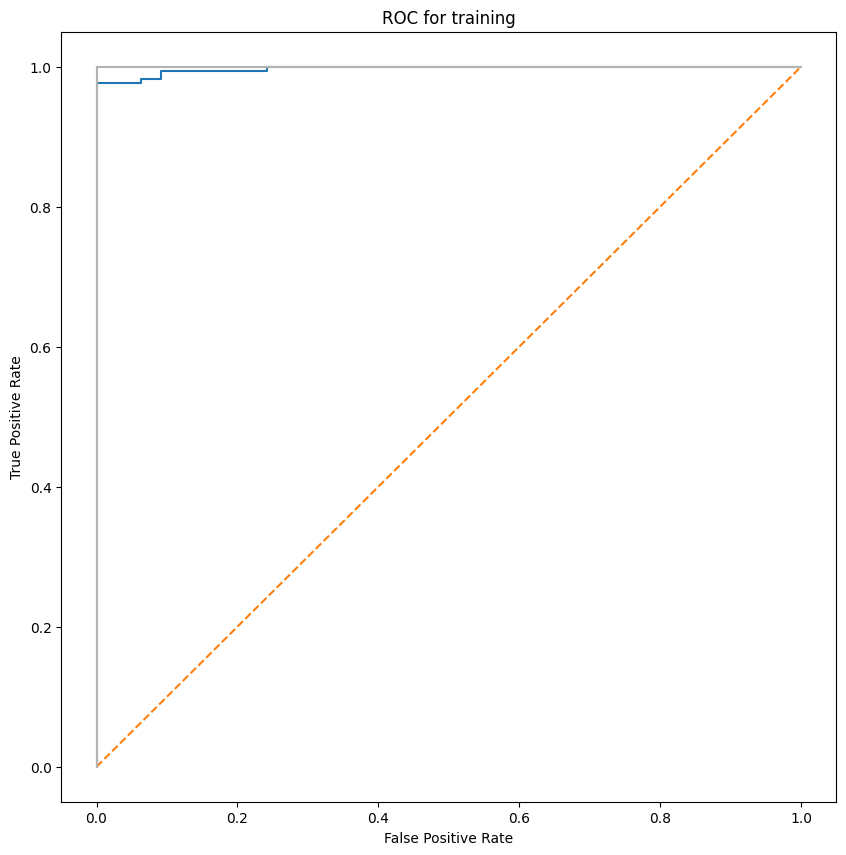

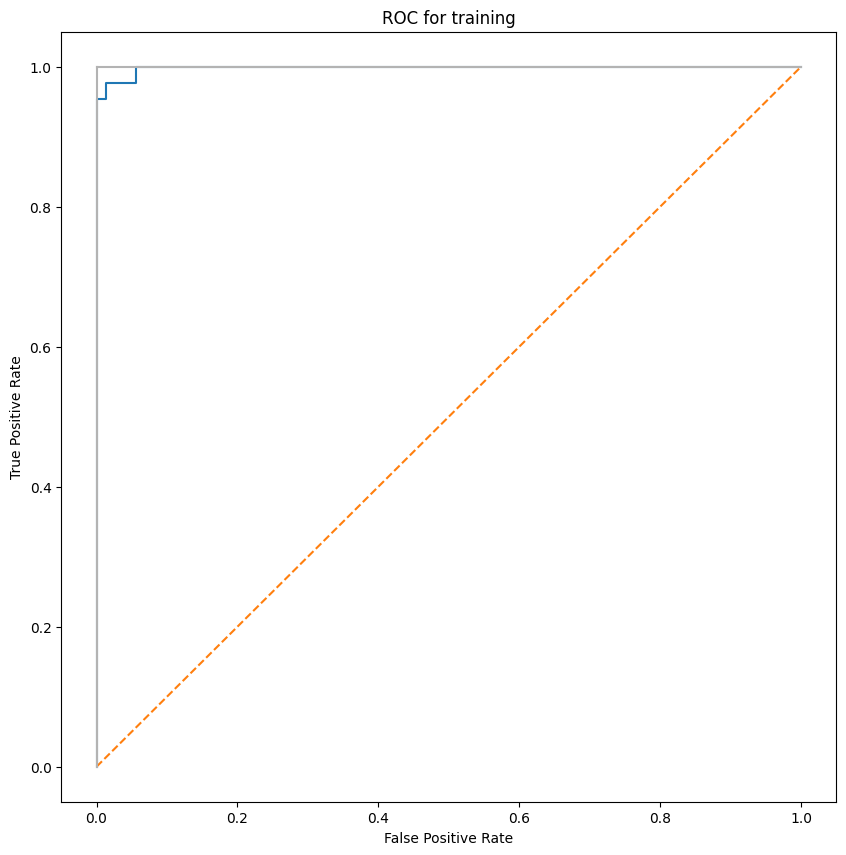

In [7]:

train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1s = []
test_f1s = []
train_aucs = []
test_aucs = []


for m in range(1,31):
    r = np.random.randint(0, 100)
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size = 0.2, random_state = r)
    X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M, test_size = 0.2, random_state = r)
    
    X_train = pd.concat([X_train_B, X_train_M])
    X_test = pd.concat([X_test_B, X_test_M])
    y_train = pd.concat([y_train_B, y_train_M])
    y_test = pd.concat([y_test_B, y_test_M])
    
    y_train = y_train.replace('M', 1)
    y_train = y_train.replace('B',0)
    y_test = y_test.replace('M', 1)
    y_test = y_test.replace('B',0)
    
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    parameters = {'C':[0.01, 0.1, 1, 1.5,2]}
    L1_SVM = LinearSVC(penalty='l1', dual = False, max_iter = 10000,multi_class='ovr', tol=1e-5)
    gridSVM = GridSearchCV(estimator = L1_SVM, param_grid = parameters, cv = KFold(5))
    gridSVM.fit(X_train_normalized, y_train)
    
    y_train_pred = gridSVM.predict(X_train_normalized) 
    y_test_pred = gridSVM.predict(X_test_normalized)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    
    
    y_train_pred_prob = gridSVM.decision_function(X_train_normalized)
    y_test_pred_prob = gridSVM.decision_function(X_test_normalized)
    train_aucs.append(roc_auc_score(y_train, y_train_pred_prob))
    test_aucs.append(roc_auc_score(y_test, y_test_pred_prob))
    
    if m == 30:
        Confusion_Matrix = confusion_matrix(y_train, y_train_pred) 
        print("Confusion Matrix for Training DataSet: \n", Confusion_Matrix)
        
        Confusion_Matrix = confusion_matrix(y_test, y_test_pred) 
        print("Confusion Matrix for Test DataSet: \n", Confusion_Matrix)
        
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_train_pred_prob)
        plt.subplots(1, figsize=(10,10))
        plt.title('ROC for training')
        plt.plot(false_positive_rate, true_positive_rate)
        plt.plot([0, 1], ls="--")
        plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_pred_prob)
        plt.subplots(1, figsize=(10,10))
        plt.title('ROC for training')
        plt.plot(false_positive_rate, true_positive_rate)
        plt.plot([0, 1], ls="--")
        plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [8]:
results= []
results.append({"Model" : 'L1_SVM', "Avg train accuracy": np.mean(train_accuracies) , "Avg test accuracy": np.mean(test_accuracies), 
                "Avg train precision": np.mean(train_precisions), "Avg test precision": np.mean(test_precisions), "Avg train recall": np.mean(train_recalls), 
                "Avg test recall": np.mean(test_recalls),"Avg train f1": np.mean(train_f1s), "Avg test f1s": np.mean(test_f1s),"Avg train auc_score": np.mean(train_aucs),
               "Avg test auc_score": np.mean(test_aucs)})


In [9]:
print(results)

[{'Model': 'L1_SVM', 'Avg train accuracy': 0.9889867841409692, 'Avg test accuracy': 0.967536231884058, 'Avg train precision': 0.9937845593889179, 'Avg test precision': 0.9704425312508126, 'Avg train recall': 0.9765285996055225, 'Avg test recall': 0.9426356589147288, 'Avg train f1': 0.9850715253440262, 'Avg test f1s': 0.9558111886858067, 'Avg train auc_score': 0.9980822865843108, 'Avg test auc_score': 0.9891688199827736}]


#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

A. Train an L1 -penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [12]:
warnings.filterwarnings(action='ignore')
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1s = []
test_f1s = []
train_aucs = []
test_aucs = []


for m in range(1,31):
    r = np.random.randint(0, 100)
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size = 0.2, random_state = r)
    X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M, test_size = 0.2, random_state = r)
    
    X_train = pd.concat([X_train_B, X_train_M])
    X_test = pd.concat([X_test_B, X_test_M])
    y_train = pd.concat([y_train_B, y_train_M])
    y_test = pd.concat([y_test_B, y_test_M])
    
    
    df_train = pd.concat([y_train, X_train], axis = 1)
    B_labelled_train, B_unlabelled_train = train_test_split(df_train[df_train[1] =='B'], train_size = 0.5, test_size=0.5, random_state = r)
    M_labelled_train, M_unlabelled_train = train_test_split(df_train[df_train[1] == 'M'], train_size = 0.5, test_size=0.5, random_state = r)
    
    labelled_train = pd.concat([B_labelled_train, M_labelled_train])
    unlabelled_train = pd.concat([B_unlabelled_train, M_unlabelled_train])
    
    y_labelled = labelled_train[1]
    X_labelled = labelled_train.loc[:, 2:]
    
    y_unlabelled = unlabelled_train[1]
    X_unlabelled = unlabelled_train.loc[:, 2:]
    
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    X_labelled_normalized = scaler.transform(X_labelled)
    X_unlabelled_normalized = scaler.transform(X_unlabelled)
    
    y_train = y_train.replace('M', 1)
    y_train = y_train.replace('B',0)
    y_test = y_test.replace('M', 1)
    y_test = y_test.replace('B',0)
    y_labelled = y_labelled.replace('M',1)
    y_labelled = y_labelled.replace('B',0)
    y_unlabelled = y_unlabelled.replace('M',1)
    y_unlabelled = y_unlabelled.replace('B',0)
    
    
    parameters = {'C':[0.01, 0.1, 1, 1.5,2]}
    L1_SVM = LinearSVC(penalty='l1', dual = False, max_iter = 10000,multi_class='ovr', tol=1e-5)
    gridSVM = GridSearchCV(estimator = L1_SVM, param_grid = parameters, cv = KFold(5))
    gridSVM.fit(X_labelled_normalized, y_labelled)
    
    
    for i in range(0,len(X_unlabelled_normalized)):
        distances = gridSVM.decision_function(X_unlabelled_normalized)
        max_element_ind = np.argmax(distances)
        max_element = pd.DataFrame(X_unlabelled_normalized).loc[max_element_ind:max_element_ind,:]
        max_element_pred = gridSVM.predict(max_element)
        X_unlabelled_normalized = pd.DataFrame(X_unlabelled_normalized)
        y_labelled = pd.concat([pd.DataFrame(y_labelled), pd.DataFrame(max_element_pred, columns = [1])]).reset_index(drop = True)
        X_labelled_normalized = pd.concat([pd.DataFrame(X_labelled_normalized), pd.DataFrame(X_unlabelled_normalized.loc[max_element_ind:max_element_ind,:])]).reset_index(drop = True)
        X_unlabelled_normalized.drop([max_element_ind], axis=0, inplace=True)
        X_unlabelled_normalized.reset_index(inplace=True, drop=True)
        gridSVM.fit(X_labelled_normalized, y_labelled[1])
        
    
    y_train_pred = gridSVM.predict(X_train_normalized) 
    y_test_pred = gridSVM.predict(X_test_normalized)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    
    
    y_train_pred_prob = gridSVM.decision_function(X_train_normalized)
    y_test_pred_prob = gridSVM.decision_function(X_test_normalized)
    train_aucs.append(roc_auc_score(y_train, y_train_pred_prob))
    test_aucs.append(roc_auc_score(y_test, y_test_pred_prob))
    
    if m == 30:
        Confusion_Matrix = confusion_matrix(y_train, y_train_pred) 
        print("Confusion Matrix for Training DataSet: \n", Confusion_Matrix)
        
        Confusion_Matrix = confusion_matrix(y_test, y_test_pred) 
        print("Confusion Matrix for Test DataSet: \n", Confusion_Matrix)
        
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_train_pred_prob)
        plt.subplots(1, figsize=(10,10))
        plt.title('ROC for training')
        plt.plot(false_positive_rate, true_positive_rate)
        plt.plot([0, 1], ls="--")
        plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_pred_prob)
        plt.subplots(1, figsize=(10,10))
        plt.title('ROC for training')
        plt.plot(false_positive_rate, true_positive_rate)
        plt.plot([0, 1], ls="--")
        plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [13]:
results.append({"Model" : 'L1_SVM Semi Supervised', "Avg train accuracy": np.mean(train_accuracies) , "Avg test accuracy": np.mean(test_accuracies), 
                "Avg train precision": np.mean(train_precisions), "Avg test precision": np.mean(test_precisions), "Avg train recall": np.mean(train_recalls), 
                "Avg test recall": np.mean(test_recalls),"Avg train f1": np.mean(train_f1s), "Avg test f1s": np.mean(test_f1s),"Avg train auc_score": np.mean(train_aucs),
               "Avg test auc_score": np.mean(test_aucs)})


In [14]:
print(results[1])

{'Model': 'L1_SVM Semi Supervised', 'Avg train accuracy': 0.9317180616740088, 'Avg test accuracy': 0.9130434782608695, 'Avg train precision': 0.8709677419354839, 'Avg test precision': 0.8113207547169812, 'Avg train recall': 0.9585798816568047, 'Avg test recall': 1.0, 'Avg train f1': 0.9126760563380281, 'Avg test f1s': 0.8958333333333334, 'Avg train auc_score': 0.9829544274888403, 'Avg test auc_score': 0.9945090439276485}


#### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k= 2.

A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall,F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall,
F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

For making sure that the k-means algorithm is not trapped in local minimum, we have to run k-means algorithm multiple times

In [22]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

Confusion Matrix for Test DataSet: 
 [[68  4]
 [ 9 34]]


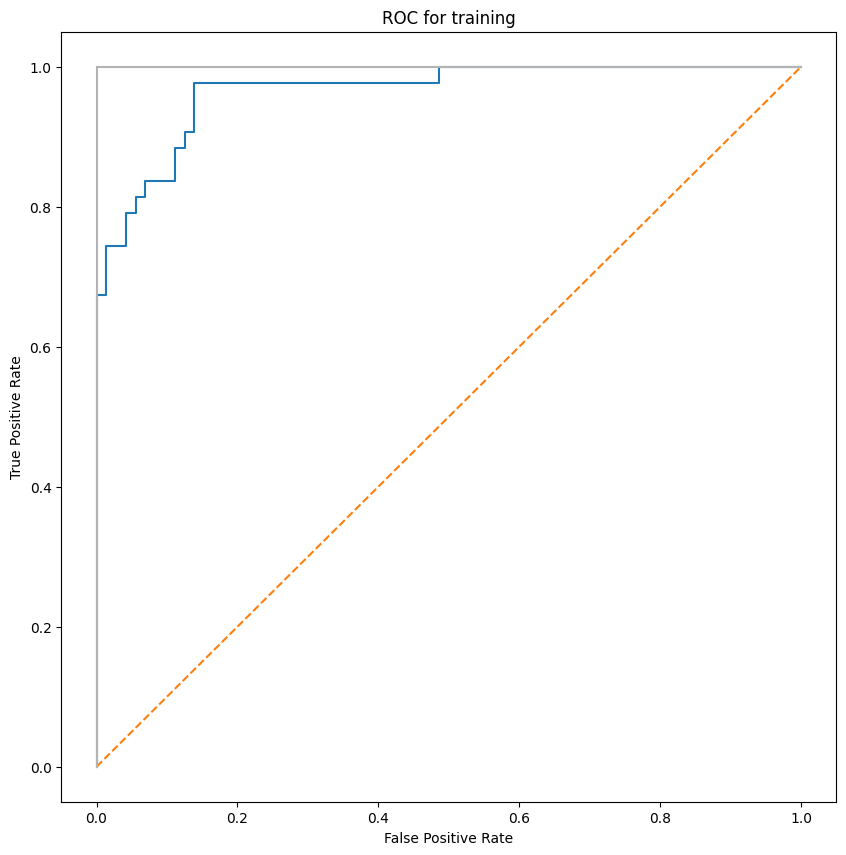

In [85]:
from collections import Counter
warnings.filterwarnings(action='ignore')
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1s = []
test_f1s = []
train_aucs = []
test_aucs = []

for m in range(1,31):
    r = np.random.randint(0, 100)
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size = 0.2, random_state = r)
    X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M, test_size = 0.2, random_state = r)

    X_train = pd.concat([X_train_B, X_train_M])
    new_index = range(0, len(X_train))
    X_train.index = new_index
    X_test = pd.concat([X_test_B, X_test_M])
    new_index = range(0, len(X_test))
    X_test.index = new_index
    y_train = pd.concat([y_train_B, y_train_M])
    new_index = range(0, len(y_train))
    y_train.index = new_index
    y_test = pd.concat([y_test_B, y_test_M])
    new_index = range(0, len(y_test))
    y_test.index = new_index
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    y_train = y_train.replace('M', 1)
    y_train = y_train.replace('B',0)
    y_test = y_test.replace('M', 1)
    y_test = y_test.replace('B',0)

    kmeans = KMeans(n_clusters=2, random_state=r).fit(X_train_normalized)
    
    pred_labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    distance1 = sorted([(i,np.linalg.norm(centers[0] - X_train_normalized[i])) for i in range(len(X_train_normalized))],key = lambda x: x[1])[:30]
    distance2 = sorted([(i,np.linalg.norm(centers[1] - X_train_normalized[i])) for i in range(len(X_train_normalized))],key = lambda x: x[1])[:30]
    
    
    closest_dx_1 = [tup[0] for tup in distance1]
    closest_dx_2 = [tup[0] for tup in distance2]
    
    c1l=(Counter(y_train[closest_dx_1]).most_common(1)[0][0])
    c2l=(Counter(y_train[closest_dx_2]).most_common(1)[0][0])
    
    
    mp=np.vectorize(lambda x:c1l if x==0 else c2l)
    y_p_train=mp(kmeans.predict(X_train_normalized))
    

    score= accuracy_score(y_train,y_p_train)
    train_accuracies.append(score)
    
    train_precision = precision_score(y_train,y_p_train)
    train_precisions.append(train_precision)
    
    train_recall = recall_score(y_train,y_p_train)
    train_recalls.append(train_recall)
    
    train_f1 = f1_score(y_train,y_p_train)
    train_f1s.append(train_f1)
    
    y_test_pred = kmeans.predict(X_test_normalized)
    
    dx_1 = [(i,np.linalg.norm(centers[0] - X_test_normalized[i])) for i in range(len(X_test_normalized))]
    dx_2 = [(i,np.linalg.norm(centers[1] - X_test_normalized[i])) for i in range(len(X_test_normalized))]
    
    dx_1 = [tup[1] for tup in dx_1]
    dx_2 = [tup[1] for tup in dx_2]
    
    y_pred = []
    
    for i in range(len(dx_1)):
        if y_test_pred[i] != 0:
            y_pred.append(1 if abs(dx_1[i]) > abs(dx_2[i]) else 0)
        else:
            y_pred.append(0 if abs(dx_1[i]) < abs(dx_2[i]) else 1)
    
    labels = y_pred
    mlabels = Counter(labels).most_common(1)[0][0]
    
    if mlabels == 0:
        y_pred = labels
    else:
        newlabels = np.vectorize(lambda x: 1 if x==0 else 0)
        y_pred = newlabels(labels).tolist()
    
    score= accuracy_score(y_test,y_pred)
    test_accuracies.append(score)
    
    test_precision = precision_score(y_test,y_pred)
    test_precisions.append(test_precision)
    
    test_recall = recall_score(y_test,y_pred)
    test_recalls.append(test_recall)
    
    test_f1 = f1_score(y_test,y_pred)
    test_f1s.append(test_f1)
    
    
    train_distances = pairwise_distances(centers, X_train_normalized, metric='euclidean')
    dist_train = train_distances.T
    y_train_pred_prob = []
    for cls in dist_train:
        y_train_pred_prob.append(list(softmax(cls)))
    y_train_pred_prob = np.array(y_train_pred_prob)
    y_train_pred_prob = 1 - y_train_pred_prob
    
    temp = 1
    if  y_train_pred_prob[0, 0] < 0.5 and y_p_train[0] == 0:
        temp = 0
    if  y_train_pred_prob[0, 0] > 0.5 and y_p_train[0] == 1:
        temp = 0
    y_train_pred_prob = y_train_pred_prob[:, temp]
    
    
    test_disances = pairwise_distances(centers, X_test_normalized, metric='euclidean')
    dist_test = test_disances.T
    y_test_pred_prob = []
    for cls in dist_test:
        y_test_pred_prob.append(list(softmax(cls)))
    y_test_pred_prob = np.array(y_test_pred_prob)
    y_test_pred_prob = 1 - np.array(y_test_pred_prob)
    y_test_pred_prob = y_test_pred_prob[:, temp]
    
    
    train_aucs.append(roc_auc_score(y_train, y_train_pred_prob))
    test_aucs.append(roc_auc_score(y_test, y_test_pred_prob))

    if m == 30:
        Confusion_Matrix = confusion_matrix(y_test, y_pred) 
        print("Confusion Matrix for Test DataSet: \n", Confusion_Matrix)
        
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_pred_prob)
        plt.subplots(1, figsize=(10,10))
        plt.title('ROC for training')
        plt.plot(false_positive_rate, true_positive_rate)
        plt.plot([0, 1], ls="--")
        plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [86]:
results= []
results.append({"Model" : 'Kmeans', "Avg train accuracy": np.mean(train_accuracies) , "Avg test accuracy": np.mean(test_accuracies), 
                "Avg train precision": np.mean(train_precisions), "Avg test precision": np.mean(test_precisions), "Avg train recall": np.mean(train_recalls), 
                "Avg test recall": np.mean(test_recalls),"Avg train f1": np.mean(train_f1s), "Avg test f1s": np.mean(test_f1s),"Avg train auc_score": np.mean(train_aucs),
               "Avg test auc_score": np.mean(test_aucs)})

In [87]:
print(results[0])

{'Model': 'Kmeans', 'Avg train accuracy': 0.9102790014684288, 'Avg test accuracy': 0.9130434782608696, 'Avg train precision': 0.9286063633510439, 'Avg test precision': 0.9227060933525691, 'Avg train recall': 0.822879684418146, 'Avg test recall': 0.8379844961240313, 'Avg train f1': 0.8722052435634521, 'Avg test f1s': 0.8776290566892122, 'Avg train auc_score': 0.9740759195819925, 'Avg test auc_score': 0.9769918173987941}


#### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit predict method.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary  classification problem.

In [89]:
df = pd.read_csv('../data/HW8/data_banknote_authentication.txt', header = None)
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [90]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1] 

#### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i.Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the
test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.